In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec

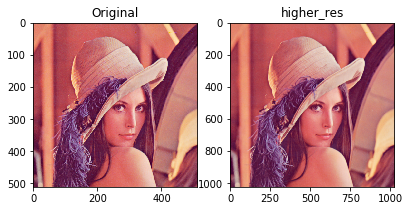

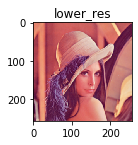

In [2]:
img = cv2.imread('../images/lena.png')

lower_reso = cv2.pyrDown(img) # 원본 이미지의 1/4 사이즈
higher_reso = cv2.pyrUp(img) #원본 이미지의 4배 사이즈

# cv2.imshow('img', img)
# cv2.imshow('lower', lower_reso)
# cv2.imshow('higher', higher_reso)
# cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original')
#plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(cv2.cvtColor(higher_reso,cv2.COLOR_BGR2RGB))
plt.title('higher_res')
#plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(133)
plt.imshow(cv2.cvtColor(lower_reso,cv2.COLOR_BGR2RGB))
plt.title('lower_res')
#plt.xticks([]), plt.yticks([])
plt.show()



In [3]:
#load image
A = cv2.imread('../images/img0.jpg')
B = cv2.imread('../images/img1.jpg')

In [4]:
#generate Gaussian Pyramid in down-sizing way 
G = A.copy()
gpA = [G]
for _ in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

In [5]:
idx = [[] for _ in range(2)]
print(idx)
idx[0].append(1)
print(idx)

[[], []]
[[1], []]


In [6]:
G = B.copy()
gpB = [G]
for _ in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

In [7]:
def setFigureIdx(levels):
    idx = [[] for _ in range(levels)]

    for i in range(level):
        idx[i].append(2**i)
    
    for i in range(level-1):
        s0 = idx[i][0]-1
        s1 = idx[i+1][0]-1
        idx[i].append(s0)
        idx[i].append(s1)
    
    idx[level-1].append(idx[-1][0]-1)
    idx[level-1].append(idx[-1][0]*2-1)

    return idx

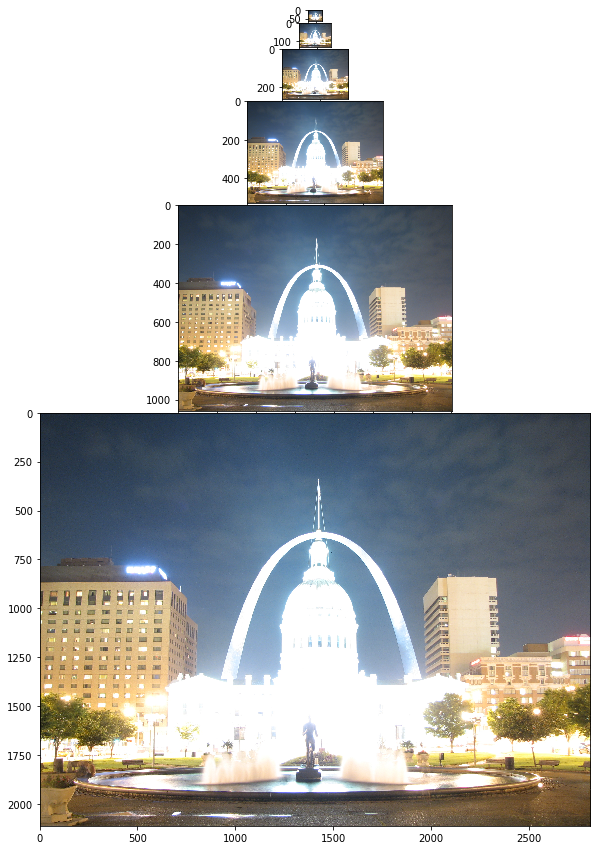

In [8]:
level=6
idx = setFigureIdx(level)
width = sum([i[0] for i in idx])
height = width

fig = plt.figure(constrained_layout=False,figsize=(15,15))
gs = gridspec.GridSpec(width,height,figure=fig)

for i in range(level-1):
    s0 = idx[i][1]
    s1 = idx[i][2]
    ax = fig.add_subplot(gs[s0:s1,:],aspect='equal')
    ax.imshow(cv2.cvtColor(gpA[level-i-1],cv2.COLOR_BGR2RGB))
        
s0,s1 = idx[-1][1],idx[-1][2]
ax = fig.add_subplot(gs[s0:s1,:],aspect='equal')
ax.imshow(cv2.cvtColor(gpA[0],cv2.COLOR_BGR2RGB))


In [9]:
# generate Laplacian Pyramid 
lpA =[gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    temp = cv2.resize(gpA[i-1], (GE.shape[:2][1],GE.shape[:2][0]))
    L = cv2.subtract(temp,GE)
    lpA.append(L)
    print(i,L.shape, "\t", gpA[i].shape)


5 (132, 176, 3) 	 (66, 88, 3)
4 (264, 352, 3) 	 (132, 176, 3)
3 (528, 704, 3) 	 (264, 352, 3)
2 (1056, 1408, 3) 	 (528, 704, 3)
1 (2112, 2816, 3) 	 (1056, 1408, 3)


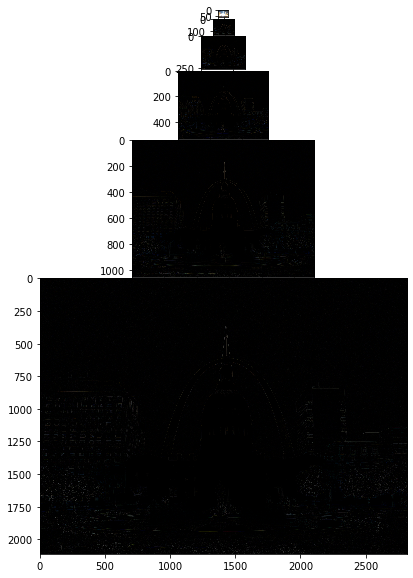

In [10]:
level=6
idx = setFigureIdx(level)
width = sum([i[0] for i in idx])
height = width

fig = plt.figure(constrained_layout=False,figsize=(10,10))
gs = gridspec.GridSpec(width,height,figure=fig)

for i in range(level-1):
    s0 = idx[i][1]
    s1 = idx[i][2]
    
    ax = fig.add_subplot(gs[s0:s1,:],aspect='equal')
    ax.imshow(cv2.cvtColor(lpA[i],cv2.COLOR_BGR2RGB))
        
s0,s1 = idx[-1][1],idx[-1][2]
ax = fig.add_subplot(gs[s0:s1,:],aspect='equal')
ax.imshow(cv2.cvtColor(lpA[level-1],cv2.COLOR_BGR2RGB))


In [11]:
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    temp = cv2.resize(gpB[i - 1], (GE.shape[:2][1], GE.shape[:2][0]))
    L = cv2.subtract(temp, GE)
    lpB.append(L)

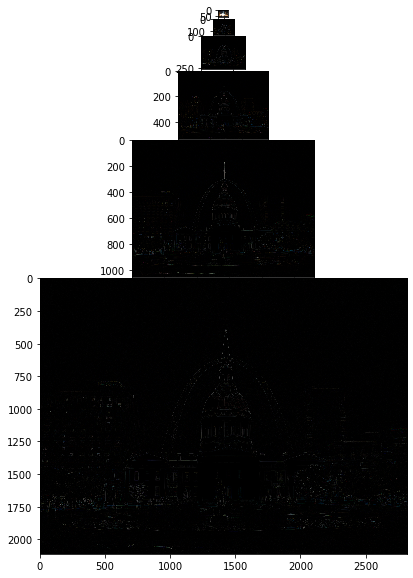

In [12]:
level=6
idx = setFigureIdx(level)
width = sum([i[0] for i in idx])
height = width

fig = plt.figure(constrained_layout=False,figsize=(10,10))
gs = gridspec.GridSpec(width,height,figure=fig)

for i in range(level-1):
    s0 = idx[i][1]
    s1 = idx[i][2]
    
    ax = fig.add_subplot(gs[s0:s1,:],aspect='equal')
    ax.imshow(cv2.cvtColor(lpB[i],cv2.COLOR_BGR2RGB))
        
s0,s1 = idx[-1][1],idx[-1][2]
ax = fig.add_subplot(gs[s0:s1,:],aspect='equal')
ax.imshow(cv2.cvtColor(lpB[level-1],cv2.COLOR_BGR2RGB))


In [18]:
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)


# 5단계
ls_ = LS[0] # 좌측과 우측이 결합된 가장 작은 이미지
print(len(ls_),len(ls_[0]))
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_) # Up Scale
    temp = cv2.resize(LS[i],(ls_.shape[:2][1], ls_.shape[:2][0])) # 외곽선만 있는 이미지
    ls_ = cv2.add(ls_, temp) # UP Scale된 이미지에 외곽선을 추가하여 선명한 이미지로 생성
    print(len(ls_),len(ls_[0]))
    
# 원본 이미지를 그대로 붙인 경우
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))


66 88
132 176
264 352
528 704
1056 1408
2112 2816


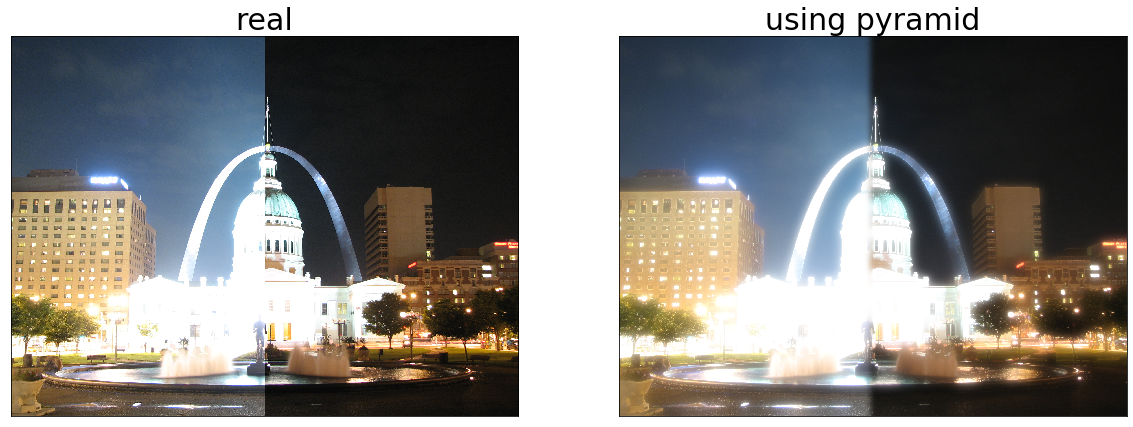

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(cv2.cvtColor(real,cv2.COLOR_BGR2RGB))
plt.title('real',fontsize=30)
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(ls_,cv2.COLOR_BGR2RGB))
plt.title('using pyramid',fontsize=30)
plt.xticks([]), plt.yticks([])
plt.show()
